In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hist
from coffea.util import load
from pocket_coffea.utils.plot_utils import *
from pocket_coffea.utils.configurator import Configurator

In [2]:
filename = "/work/mmarcheg/PocketCoffea/output/datamc/ttHbb_ttbar_ST_datamc_btagcalibrated_SingleMuon_bugfix/output_{dataset}.coffea"
config = "/work/mmarcheg/PocketCoffea/config/datamc/ttHbb_ttbar_ST_datamc.py"
o = load(filename)
o.keys()

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata', 'scale_genweight'])

In [3]:
histname = 'JetGood_pt_2'
h = o['variables'][histname]
h

{'DATA_SingleEle': Hist(
   StrCategory(['SingleEle_1b', 'SingleEle_1b_btagcalibrated', 'SingleEle_2b', 'SingleEle_2b_btagcalibrated', 'SingleEle_3b', 'SingleEle_3b_btagcalibrated', 'SingleEle_4b', 'SingleEle_4b_btagcalibrated', 'SingleMuon_1b', 'SingleMuon_1b_btagcalibrated', 'SingleMuon_2b', 'SingleMuon_2b_btagcalibrated', 'SingleMuon_3b', 'SingleMuon_3b_btagcalibrated', 'SingleMuon_4b', 'SingleMuon_4b_btagcalibrated', 'baseline'], name='cat', label='Category'),
   StrCategory(['2018'], name='year', label='Year'),
   Regular(100, 0, 1000, name='JetGood.pt', label='$p_{T}^{j}$ [GeV]'),
   storage=Weight()) # Sum: WeightedSum(value=6.19983e+06, variance=6.19983e+06) (WeightedSum(value=6.20015e+06, variance=6.20015e+06) with flow),
 'DATA_SingleMuon': Hist(
   StrCategory(['SingleEle_1b', 'SingleEle_1b_btagcalibrated', 'SingleEle_2b', 'SingleEle_2b_btagcalibrated', 'SingleEle_3b', 'SingleEle_3b_btagcalibrated', 'SingleEle_4b', 'SingleEle_4b_btagcalibrated', 'SingleMuon_1b', 'SingleMuon_

In [7]:
samples = h.keys()
h_mc = h[samples_mc[0]]
variations = get_axis_items(h_mc, 'variation')
variations

['nominal',
 'pileupDown',
 'pileupUp',
 'sf_btag_cferr1Down',
 'sf_btag_cferr1Up',
 'sf_btag_cferr2Down',
 'sf_btag_cferr2Up',
 'sf_btag_hfDown',
 'sf_btag_hfUp',
 'sf_btag_hfstats1Down',
 'sf_btag_hfstats1Up',
 'sf_btag_hfstats2Down',
 'sf_btag_hfstats2Up',
 'sf_btag_lfDown',
 'sf_btag_lfUp',
 'sf_btag_lfstats1Down',
 'sf_btag_lfstats1Up',
 'sf_btag_lfstats2Down',
 'sf_btag_lfstats2Up',
 'sf_ele_idDown',
 'sf_ele_idUp',
 'sf_ele_recoDown',
 'sf_ele_recoUp',
 'sf_ele_trigger_eraDown',
 'sf_ele_trigger_eraUp',
 'sf_ele_trigger_htDown',
 'sf_ele_trigger_htUp',
 'sf_ele_trigger_pileupDown',
 'sf_ele_trigger_pileupUp',
 'sf_ele_trigger_statDown',
 'sf_ele_trigger_statUp',
 'sf_jet_puIdDown',
 'sf_jet_puIdUp',
 'sf_mu_idDown',
 'sf_mu_idUp',
 'sf_mu_isoDown',
 'sf_mu_isoUp',
 'sf_mu_triggerDown',
 'sf_mu_triggerUp']

In [5]:
samples_mc = list(filter(lambda d: 'DATA' not in d, samples))
slicing_mc = {'year': '2018', 'cat': 'SingleEle_1b_btagcalibrated'}
slicing_mc_nominal = {'year': '2018', 'cat': 'SingleEle_1b_btagcalibrated', 'variation' : 'nominal'}
dict_mc = {d: h[d][slicing_mc] for d in samples_mc}
dict_mc_nominal = {d: h[d][slicing_mc_nominal] for d in samples_mc}

stack_mc = hist.Stack.from_dict(dict_mc)
stack_mc_nominal = hist.Stack.from_dict(dict_mc_nominal)

stack_mc

Stack<('ST_t-channel_antitop_4f_InclusiveDecays', 'ST_s-channel_4f_leptonDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'ST_tW_antitop_5f_NoFullyHadronicDecays', 'ttHTobb', 'TTTo2L2Nu', 'ST_tW_top_5f_NoFullyHadronicDecays', 'TTToSemiLeptonic') of Hist(
  StrCategory(['nominal', 'pileupDown', 'pileupUp', 'sf_btag_cferr1Down', 'sf_btag_cferr1Up', 'sf_btag_cferr2Down', 'sf_btag_cferr2Up', 'sf_btag_hfDown', 'sf_btag_hfUp', 'sf_btag_hfstats1Down', 'sf_btag_hfstats1Up', 'sf_btag_hfstats2Down', 'sf_btag_hfstats2Up', 'sf_btag_lfDown', 'sf_btag_lfUp', 'sf_btag_lfstats1Down', 'sf_btag_lfstats1Up', 'sf_btag_lfstats2Down', 'sf_btag_lfstats2Up', 'sf_ele_idDown', 'sf_ele_idUp', 'sf_ele_recoDown', 'sf_ele_recoUp', 'sf_ele_trigger_eraDown', 'sf_ele_trigger_eraUp', 'sf_ele_trigger_htDown', 'sf_ele_trigger_htUp', 'sf_ele_trigger_pileupDown', 'sf_ele_trigger_pileupUp', 'sf_ele_trigger_statDown', 'sf_ele_trigger_statUp', 'sf_jet_puIdDown', 'sf_jet_puIdUp', 'sf_mu_idDown', 'sf_mu_idUp', 'sf_mu_isoDown', '

In [ ]:
stack_mc_nominal

In [8]:
variations_btag = ['sf_btag_cferr1Down', 'sf_btag_cferr1Up']

In [9]:
variations
up_dict, down_dict = get_systematic_uncertainty(stack_mc, variations_btag, mcstat=False, stat_only=False, edges=None)
up_dict, down_dict

({'sf_btag_cferr1': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.62226566e+06,
         7.89341288e+07, 2.05342962e+08, 2.17695288e+08, 1.72146109e+08,
         1.17322552e+08, 7.38412400e+07, 4.63696729e+07, 2.72050713e+07,
         1.58400437e+07, 9.15589661e+06, 6.29251825e+06, 3.50973283e+06,
         1.97487303e+06, 1.08639736e+06, 6.27795207e+05, 3.61539344e+05,
         1.95277895e+05, 1.07934952e+05, 6.02941469e+04, 3.40120956e+04,
         1.95908089e+04, 1.09094997e+04, 6.12431586e+03, 3.42313390e+03,
         2.24275010e+03, 1.51976468e+03, 9.48860279e+02, 8.26442043e+02,
         1.71008727e+04, 1.30000233e+04, 1.03131833e+04, 8.14705127e+03,
         5.52308227e+03, 4.91004242e+03, 4.10349301e+03, 2.98258548e+03,
         2.58546735e+03, 2.24631029e+03, 1.66581458e+03, 1.34879295e+03,
         1.10432001e+03, 9.43259456e+02, 7.92256983e+02, 7.01697971e+02,
         6.23821949e+02, 4.20039830e+02, 3.64837299e+02, 2.60817195e+02,
         2.13635429e+02, 1.922828

In [12]:
stack_sum(stack_mc_nominal)

Hist(Regular(100, 0, 1000, name='JetGood.pt', label='$p_{T}^{j}$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=1.19636e+06, variance=65809.8) (WeightedSum(value=1.19639e+06, variance=65812.9) with flow)

In [62]:
h_up = stack_sum(stack_mc)[{'variation' : 'sf_btag_cferr1Up'}]
h_down = stack_sum(stack_mc)[{'variation' : 'sf_btag_cferr1Down'}]
h_nom = stack_sum(stack_mc)[{'variation' : 'nominal'}]

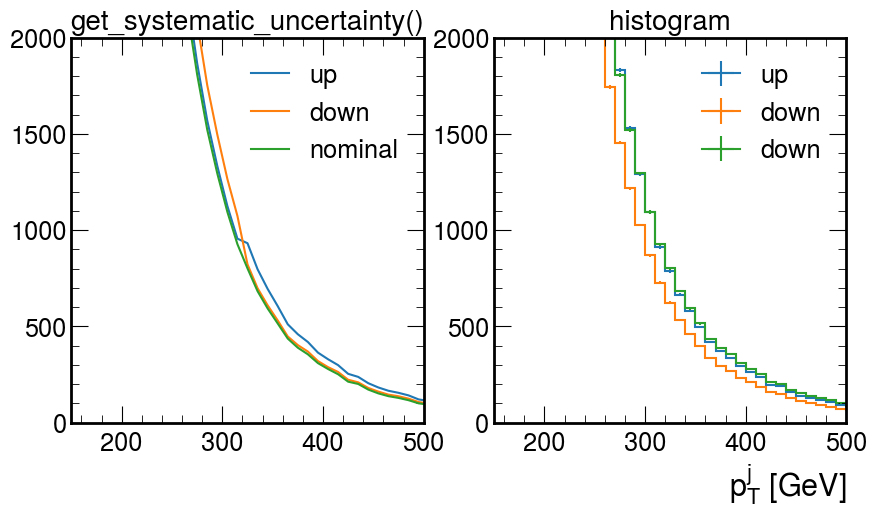

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[10,5])
residue_syst_up = np.sqrt(up_dict['sf_btag_cferr1'])
residue_syst_down = -np.sqrt(down_dict['sf_btag_cferr1'])
ax1.plot(h[list(h.keys())[0]].axes[-1].centers, stack_sum(stack_mc_nominal).values()+residue_syst_up, label='up');
ax1.plot(h[list(h.keys())[0]].axes[-1].centers, stack_sum(stack_mc_nominal).values()-residue_syst_down, label='down');
ax1.plot(h[list(h.keys())[0]].axes[-1].centers, stack_sum(stack_mc_nominal).values(), label='nominal');

h_up.plot1d(ax=ax2, label='up')
h_down.plot1d(ax=ax2, label='down')
h_nom.plot1d(ax=ax2, label='down')

ax1.set_xlim(150,500)
ax1.set_ylim(0, 2000)
ax2.set_xlim(150,500)
ax2.set_ylim(0, 2000)
ax1.legend()
ax2.legend();
ax1.set_title("get_systematic_uncertainty()", fontsize=20)
ax2.set_title("histogram", fontsize=20);

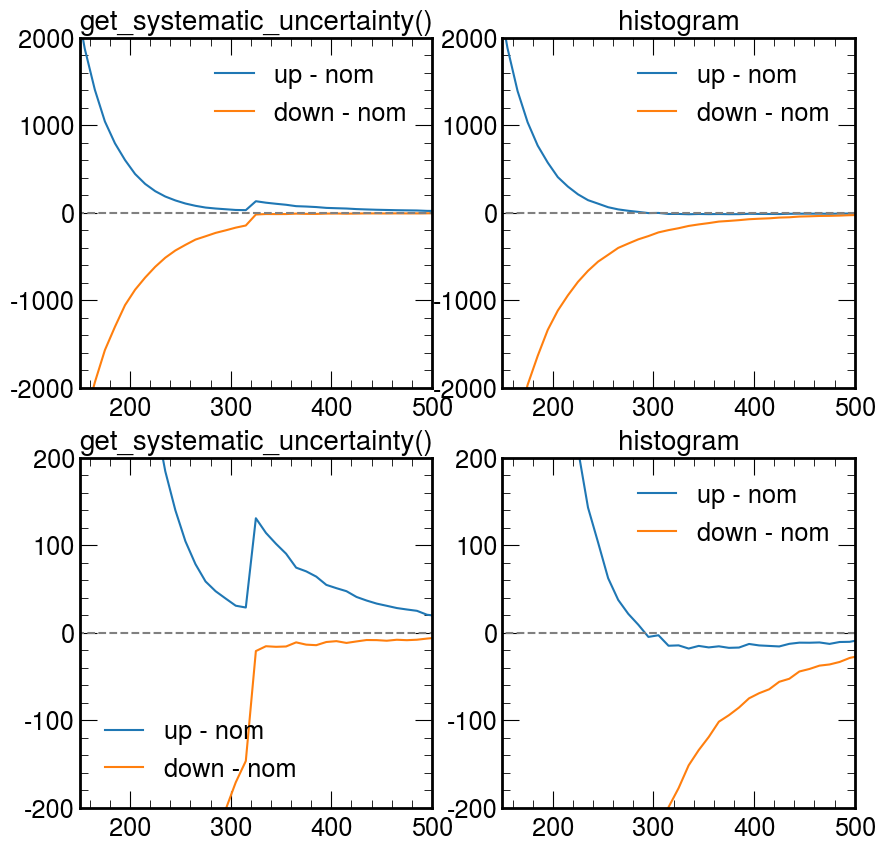

In [103]:
fig, axes = plt.subplots(2,2, figsize=[10,10])
axes_left = [axes[0][0]] + [axes[1][0]]
axes_right = [axes[0][1]] + [axes[1][1]]
x = h[list(h.keys())[0]].axes[-1].centers

for i, ylim in enumerate([(-2000, 2000), (-200, 200)]):
    
    axes_left[i].plot(x, residue_syst_up, label='up - nom');
    axes_left[i].plot(x, residue_syst_down, label='down - nom');
    axes_left[i].hlines(0, h[list(h.keys())[0]].axes[-1].edges[0], h[list(h.keys())[0]].axes[-1].edges[-1], linestyles='dashed', color='gray');

    residue_hist_up = h_up.values()-h_nom.values()
    residue_hist_down = h_down.values()-h_nom.values()
    axes_right[i].plot(x, residue_hist_up, label='up - nom');
    axes_right[i].plot(x, residue_hist_down, label='down - nom');
    axes_right[i].hlines(0, h[list(h.keys())[0]].axes[-1].edges[0], h[list(h.keys())[0]].axes[-1].edges[-1], linestyles='dashed', color='gray');

    #h_up.plot1d(ax=ax2, label='up')
    #h_down.plot1d(ax=ax2, label='down')
    #h_nom.plot1d(ax=ax2, label='down')

    axes_left[i].set_xlim(150,500)
    axes_left[i].set_ylim(*ylim)
    axes_right[i].set_xlim(150,500)
    axes_right[i].set_ylim(*ylim)
    axes_left[i].legend()
    axes_right[i].legend();
    axes_left[i].set_title("get_systematic_uncertainty()", fontsize=20)
    axes_right[i].set_title("histogram", fontsize=20);

In [126]:
up_is_up = residue_hist_up > 0
down_is_down = residue_hist_down < 0
is_onesided = (up_is_up ^ down_is_down)

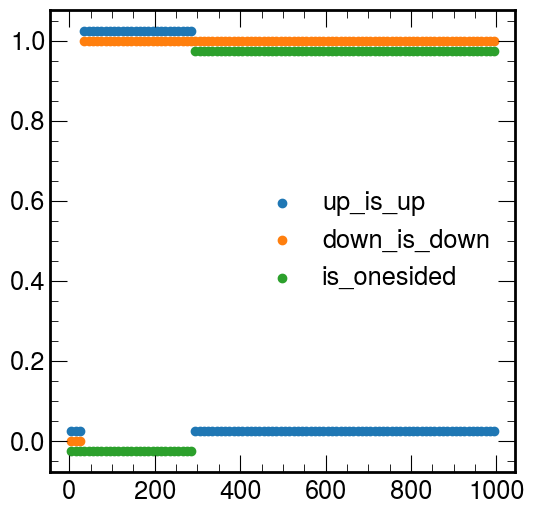

In [127]:
offset = 0.025
fig, ax = plt.subplots(1,1,figsize=[6,6])
ax.scatter(x, up_is_up+offset, label='up_is_up');
ax.scatter(x, down_is_down, label='down_is_down');
ax.scatter(x, is_onesided-offset, label='is_onesided');
ax.legend();

In [143]:
syst_err_up_twosided = np.where(up_is_up, residue_hist_up, residue_hist_down)
syst_err_down_twosided = np.where(up_is_up, residue_hist_down, residue_hist_up)
syst_err_up_max = np.maximum(abs(syst_err_up_twosided), abs(syst_err_down_twosided))
syst_err_down_max = -syst_err_up_max

syst_err_up_onesided = np.where(is_onesided & up_is_up, syst_err_up_max, 0)
syst_err_down_onesided = np.where(is_onesided & down_is_down, syst_err_down_max, 0)

syst_err_up_combined = np.where(is_onesided, syst_err_up_onesided, syst_err_up_twosided)
syst_err_down_combined = np.where(is_onesided, syst_err_down_onesided, syst_err_down_twosided)

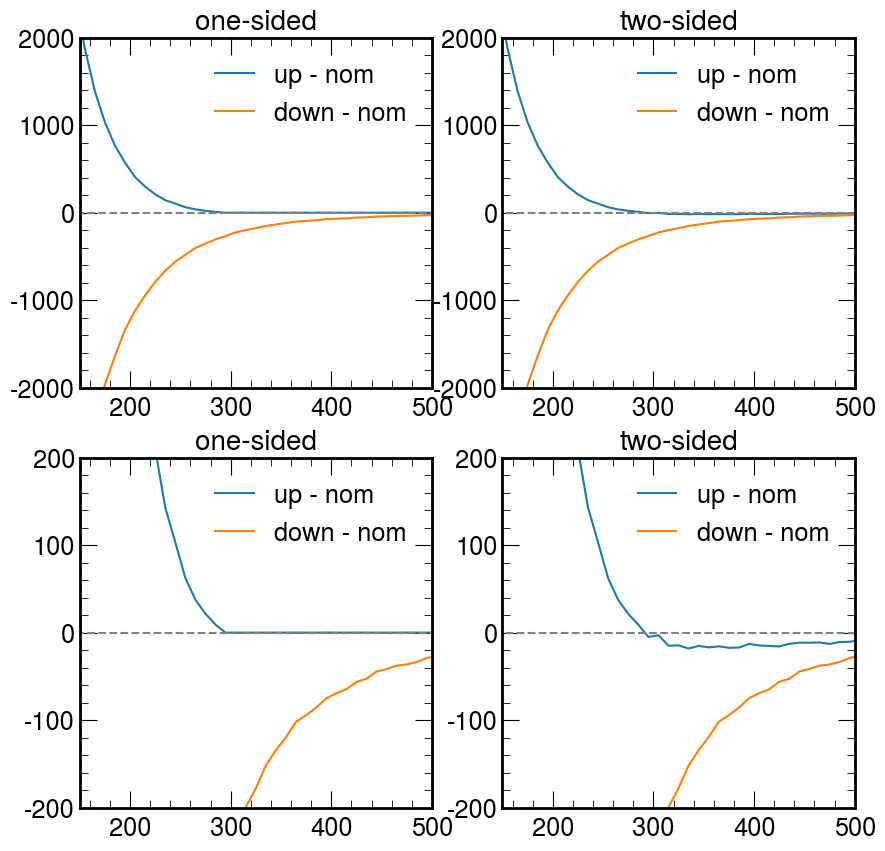

In [146]:
fig, axes = plt.subplots(2,2, figsize=[10,10])
axes_left = [axes[0][0]] + [axes[1][0]]
axes_right = [axes[0][1]] + [axes[1][1]]
x = h[list(h.keys())[0]].axes[-1].centers

for i, ylim in enumerate([(-2000, 2000), (-200, 200)]):
    
    axes_left[i].plot(x, syst_err_up_combined, label='up - nom');
    axes_left[i].plot(x, syst_err_down_combined, label='down - nom');
    axes_left[i].hlines(0, h[list(h.keys())[0]].axes[-1].edges[0], h[list(h.keys())[0]].axes[-1].edges[-1], linestyles='dashed', color='gray');

    residue_hist_up = h_up.values()-h_nom.values()
    residue_hist_down = h_down.values()-h_nom.values()
    axes_right[i].plot(x, residue_hist_up, label='up - nom');
    axes_right[i].plot(x, residue_hist_down, label='down - nom');
    axes_right[i].hlines(0, h[list(h.keys())[0]].axes[-1].edges[0], h[list(h.keys())[0]].axes[-1].edges[-1], linestyles='dashed', color='gray');

    #h_up.plot1d(ax=ax2, label='up')
    #h_down.plot1d(ax=ax2, label='down')
    #h_nom.plot1d(ax=ax2, label='down')

    axes_left[i].set_xlim(150,500)
    axes_left[i].set_ylim(*ylim)
    axes_right[i].set_xlim(150,500)
    axes_right[i].set_ylim(*ylim)
    axes_left[i].legend()
    axes_right[i].legend();
    axes_left[i].set_title("one-sided", fontsize=20)
    axes_right[i].set_title("two-sided", fontsize=20);

/tmp/ipykernel_52316/1342702478.py:6: RuntimeWarning: invalid value encountered in true_divide
  up_r = up / nom
/tmp/ipykernel_52316/1342702478.py:7: RuntimeWarning: invalid value encountered in true_divide
  down_r = down / nom


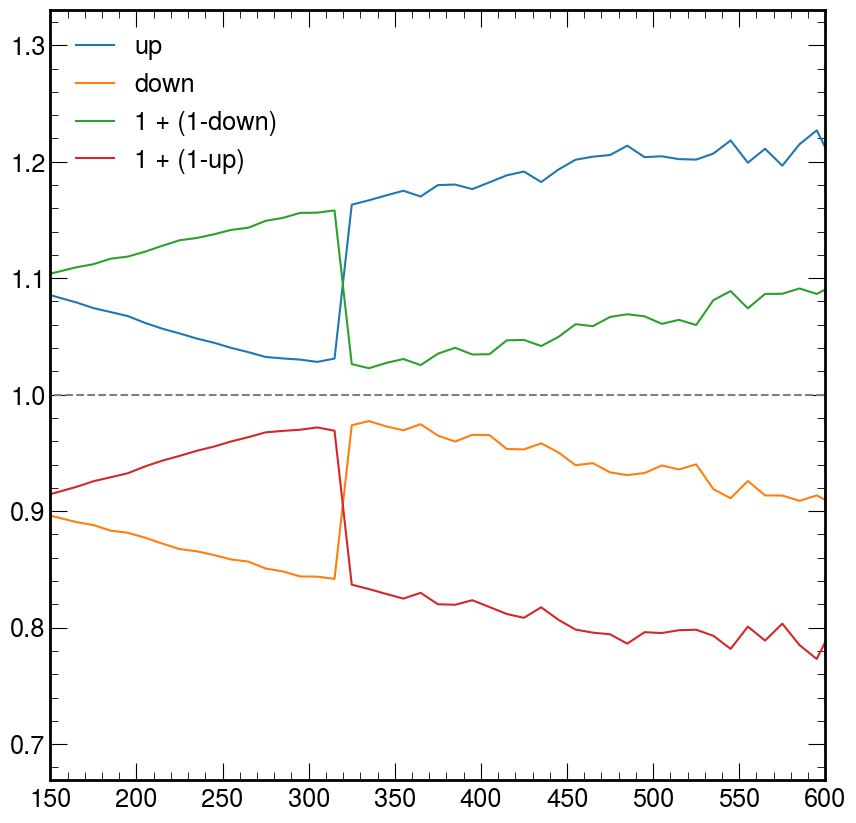

In [42]:
h_mc_sum = stack_sum(stack_mc_nominal)
nom = h_mc_sum.values()
up = nom + np.sqrt(sum(up_dict.values()))
down = nom - np.sqrt(sum(down_dict.values()))

up_r = up / nom
down_r = down / nom

unc_band = np.array([down_r, up_r])

plt.plot(h[list(h.keys())[0]].axes[-1].centers, up_r, label='up');
plt.plot(h[list(h.keys())[0]].axes[-1].centers, down_r, label='down');
plt.plot(h[list(h.keys())[0]].axes[-1].centers, 2-down_r, label='1 + (1-down)');
plt.plot(h[list(h.keys())[0]].axes[-1].centers, 2-up_r, label='1 + (1-up)');

plt.legend()
plt.xlim(150,600)

plt.hlines(1.0, *ak.Array(h_mc_sum.axes[0].edges)[[0,-1]], colors='gray', linestyles='dashed');